In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import Modules and Data

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import *
import tensorflow as tf
import os
import random

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [ ]:
# Load train set
df_train = pd.read_csv('/content/drive/My Drive/MSDS 422/Assignment 8/train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Load test set
df_test = pd.read_csv('/content/drive/My Drive/MSDS 422/Assignment 8/test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (7613, 5)
Test data dimensions:  (3263, 4)


# Explore Data

## Missing Values

In [ ]:
# Return the number of missing values in each column

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df_train)

Your selected dataframe has 5 columns and 7613 Rows.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Data Type
location,2533,33.3,object
keyword,61,0.8,object


## Target

[Text(0.5, 1.0, 'Distribution of Label')]

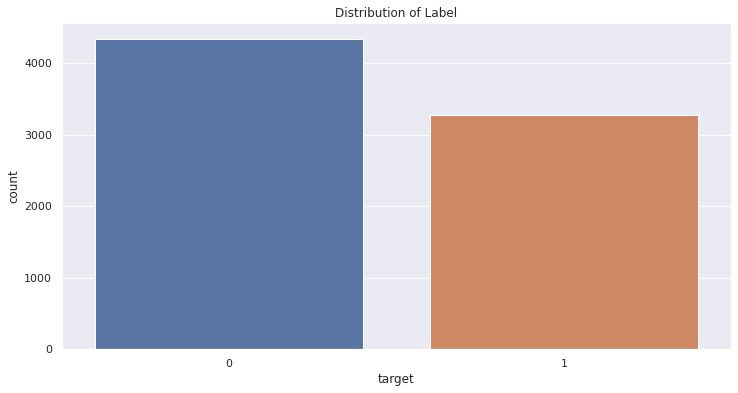

In [ ]:
# Distribution of target for train data

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df_train.target).set(title="Distribution of Label")

## Number of Characters

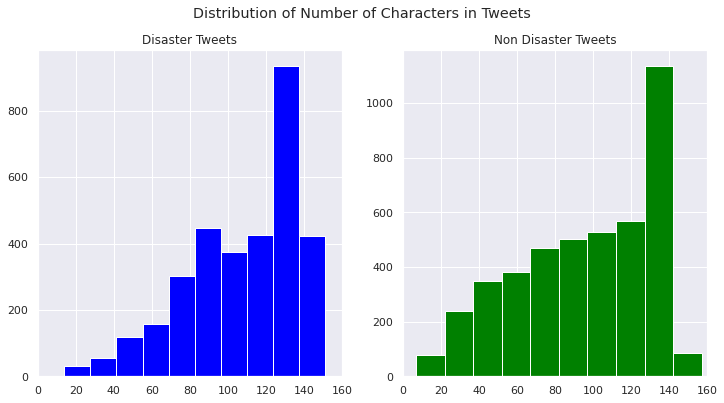

In [ ]:
# Number of characters in tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

disaster_tweet = df_train[df_train['target']==1]
disaster_tweet_len = disaster_tweet['text'].str.len()
ax1.hist(disaster_tweet_len,color='blue')
ax1.set_title('Disaster Tweets')
ax1.set_xlim(0,160)

non_disaster_tweet = df_train[df_train['target']==0]
non_disaster_tweet_len = non_disaster_tweet['text'].str.len()
ax2.hist(non_disaster_tweet_len,color='green')
ax2.set_title('Non Disaster Tweets')
ax2.set_xlim(0,160)

fig.suptitle('Distribution of Number of Characters in Tweets')
plt.show()

## Number of Words

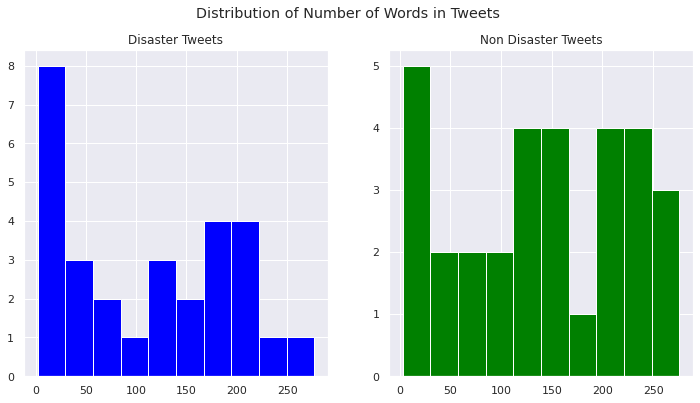

In [ ]:
# Number of characters in tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

disaster_tweet = df_train[df_train['target']==1]
disaster_tweet_len = disaster_tweet['text'].str.split().apply(len).value_counts()
ax1.hist(disaster_tweet_len,color='blue')
ax1.set_title('Disaster Tweets')

non_disaster_tweet = df_train[df_train['target']==0]
non_disaster_tweet_len = non_disaster_tweet['text'].str.split().apply(len).value_counts()
ax2.hist(non_disaster_tweet_len,color='green')
ax2.set_title('Non Disaster Tweets')

fig.suptitle('Distribution of Number of Words in Tweets')
plt.show()

## Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df_train['number_of_stopwords'] = df_train['text'].str.split().apply(lambda x: len(set(x) & stop_words))

df_train.head()

,id,keyword,location,text,target,number_of_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,5
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,7
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,5


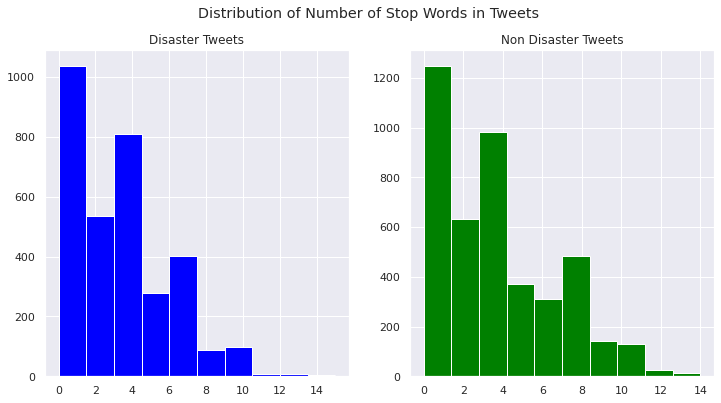

In [ ]:
# Number of stopwords in disaster tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

disaster_tweet = df_train[df_train['target']==1]
ax1.hist(disaster_tweet['number_of_stopwords'],color='blue')
ax1.set_title('Disaster Tweets')

non_disaster_tweet = df_train[df_train['target']==0]
ax2.hist(non_disaster_tweet['number_of_stopwords'],color='green')
ax2.set_title('Non Disaster Tweets')

fig.suptitle('Distribution of Number of Stop Words in Tweets')
plt.show()

In [ ]:
# Top 10 stop words

from collections import defaultdict

disaster_dic = defaultdict(int)
non_disaster_dic = defaultdict(int)

for x in disaster_tweet['text'].str.split():
    for y in x:
        disaster_dic[y] += 1

for x in non_disaster_tweet['text'].str.split():
    for y in x:
        non_disaster_dic[y] += 1

print(disaster_dic)
print(non_disaster_dic)

defaultdict(<class 'int'>, {'Our': 16, 'Deeds': 1, 'are': 150, 'the': 1051, 'Reason': 2, 'of': 888, 'this': 110, '#earthquake': 8, 'May': 9, 'ALLAH': 1, 'Forgive': 1, 'us': 11, 'all': 48, 'Forest': 27, 'fire': 108, 'near': 44, 'La': 11, 'Ronge': 1, 'Sask.': 1, 'Canada': 2, 'All': 18, 'residents': 4, 'asked': 1, 'to': 706, "'shelter": 1, 'in': 1037, "place'": 1, 'being': 26, 'notified': 1, 'by': 244, 'officers.': 1, 'No': 27, 'other': 15, 'evacuation': 26, 'or': 42, 'shelter': 4, 'place': 12, 'orders': 9, 'expected': 9, '13,000': 1, 'people': 83, 'receive': 2, '#wildfires': 5, 'California': 86, 'Just': 17, 'got': 28, 'sent': 4, 'photo': 4, 'from': 206, 'Ruby': 1, '#Alaska': 1, 'as': 139, 'smoke': 9, 'pours': 1, 'into': 69, 'a': 730, 'school': 16, '#RockyFire': 4, 'Update': 5, '=>': 1, 'Hwy.': 4, '20': 9, 'closed': 13, 'both': 6, 'directions': 1, 'due': 22, 'Lake': 6, 'County': 23, '-': 389, '#CAfire': 1, '#flood': 3, '#disaster': 5, 'Heavy': 7, 'rain': 21, 'causes': 7, 'flash': 13, 'flo

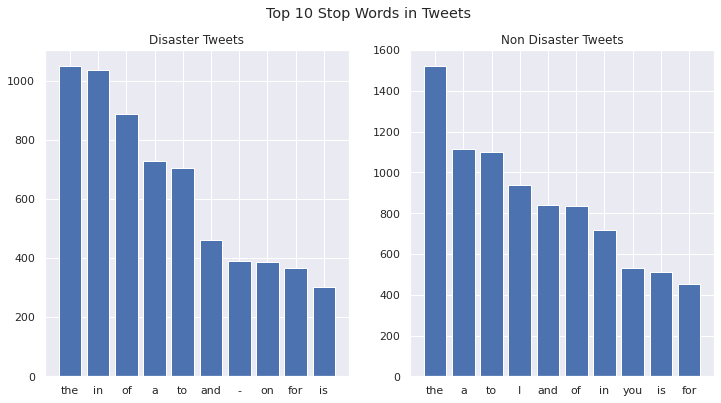

In [ ]:
top_disaster_stopwords = sorted(disaster_dic.items(), key=lambda x:x[1],reverse=True)[:10]
top_non_disaster_stopwords = sorted(non_disaster_dic.items(), key=lambda x:x[1],reverse=True)[:10]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

x1, y1 = zip(*top_disaster_stopwords)
ax1.bar(x1,y1)
ax1.set_title('Disaster Tweets')

x2, y2 = zip(*top_non_disaster_stopwords)
ax2.bar(x2,y2)
ax2.set_title('Non Disaster Tweets')

fig.suptitle('Top 10 Stop Words in Tweets')
plt.show()

# Clean Data

## Remove URLs

In [ ]:
import re

df_train['text'] = df_train['text'].apply(lambda x: re.split('https?://\S+|www\.\S+', str(x))[0])
df_test['text'] = df_test['text'].apply(lambda x: re.split('https?://\S+|www\.\S+', str(x))[0])

URLPATTERN = r'(https?://\S+|www\.\S+)'
print(df_train.text.apply(lambda x: re.findall(URLPATTERN, x)).str.len().sum())
print(df_test.text.apply(lambda x: re.findall(URLPATTERN, x)).str.len().sum())

0
0


## Remove Emojis

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df_train['text']=df_train['text'].apply(lambda x: remove_emoji(x))
df_test['text']=df_test['text'].apply(lambda x: remove_emoji(x))

## Remove HTML Tags

In [ ]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_train['text'] = df_train['text'].apply(lambda cw : remove_tags(cw))
df_test['text'] = df_test['text'].apply(lambda cw : remove_tags(cw))

## Remove Punctuations

In [ ]:
import string

def remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

df_train['text']=df_train['text'].apply(lambda x : remove_punct(x))
df_test['text']=df_test['text'].apply(lambda x : remove_punct(x))

## Use Glo-Ve for Word Embeddings

In [ ]:
# Download glove zip file
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-05-20 15:03:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-20 15:03:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-20 15:03:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# Unzip glove zip file
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# Get the path of where it is saved
!ls
!pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [ ]:
# Index the vectors
word_embeddings={}
with open('/content/glove.6B.100d.txt','r') as f:
    for line in f:
        data=line.split()
        x = data[0]
        vectors=np.asarray(data[1:],'float32')
        word_embeddings[x]=vectors
f.close()

In [ ]:
nltk.download('punkt')
from tqdm import tqdm
from nltk.tokenize import word_tokenize

corpus = []
for x in tqdm(df_train["text"]):
    words=[word.lower() for word in word_tokenize(x)]
    corpus.append(words)

for x in tqdm(df_test["text"]):
    words=[word.lower() for word in word_tokenize(x)]
    corpus.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


100%|██████████| 3263/3263 [00:00<00:00, 8229.69it/s]


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

l=50
token=Tokenizer()
token.fit_on_texts(corpus)
seq=token.texts_to_sequences(corpus)

text=pad_sequences(seq,maxlen=l,truncating='post',
                        padding='post')
index=token.word_index
print(len(index))

21901


In [ ]:
len_matrix=len(index)+1
word_matrix=np.zeros((len_matrix,100))

for word,i in tqdm(index.items()):
    if i < len_matrix:
        vec=word_embeddings.get(word)
        if vec is not None:
            word_matrix[i]=vec

100%|██████████| 21901/21901 [00:00<00:00, 531877.23it/s]


## Train-Test Split

In [ ]:
# Split the data into train and validations sets by using train_test_split
from sklearn.model_selection import train_test_split

length= df_train.shape[0]
print("length:",length)

train_data = text[:length]
test_data=text[length:]

labels = df_train["target"].values

x_train, x_val, y_train, y_val = train_test_split(train_data,labels, test_size=0.2, 
                                                random_state=10)

print('train data shape', x_train.shape)
print('validation data shape', x_val.shape)

length: 7613
train data shape (6090, 50)
validation data shape (1523, 50)


# Build Models

## Model 1

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout, Masking, Bidirectional, BatchNormalization
from keras.initializers import Constant
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()

embedding=Embedding(len_matrix,100,embeddings_initializer=Constant(word_matrix),
                   input_length=l,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimzer=Adam(learning_rate=5e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 100)           2190200   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 50)               

In [ ]:
callback=EarlyStopping(monitor="val_loss", patience=2)

lstm_history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_val,y_val), verbose=2, callbacks=[callback])

Epoch 1/100
24/24 - 4s - loss: 0.4627 - accuracy: 0.7926 - val_loss: 0.4471 - val_accuracy: 0.7938
Epoch 2/100
24/24 - 4s - loss: 0.4614 - accuracy: 0.7920 - val_loss: 0.4478 - val_accuracy: 0.7958
Epoch 3/100
24/24 - 4s - loss: 0.4555 - accuracy: 0.7967 - val_loss: 0.4446 - val_accuracy: 0.7991
Epoch 4/100
24/24 - 4s - loss: 0.4623 - accuracy: 0.7898 - val_loss: 0.4441 - val_accuracy: 0.7984
Epoch 5/100
24/24 - 4s - loss: 0.4650 - accuracy: 0.7839 - val_loss: 0.4446 - val_accuracy: 0.7978
Epoch 6/100
24/24 - 4s - loss: 0.4557 - accuracy: 0.7941 - val_loss: 0.4437 - val_accuracy: 0.7958
Epoch 7/100
24/24 - 4s - loss: 0.4603 - accuracy: 0.7918 - val_loss: 0.4438 - val_accuracy: 0.7971
Epoch 8/100
24/24 - 4s - loss: 0.4616 - accuracy: 0.7880 - val_loss: 0.4475 - val_accuracy: 0.7971


## Model 2

In [ ]:
model2=Sequential()

embedding=Embedding(len_matrix,100,embeddings_initializer=Constant(word_matrix),
                   input_length=l,trainable=False)

model2.add(embedding)
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(256)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))

optimzer=Adam(learning_rate=5e-5)

model2.compile(loss='binary_crossentropy',optimizer=optimzer,
              metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 100)           2190200   
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               731136    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)              

In [ ]:
callback=EarlyStopping(monitor="val_loss", patience=2)

lstm_history = model2.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_val,y_val), verbose=2, callbacks=[callback])

Epoch 1/100
24/24 - 10s - loss: 0.4040 - accuracy: 0.8209 - val_loss: 0.4470 - val_accuracy: 0.8063
Epoch 2/100
24/24 - 9s - loss: 0.4103 - accuracy: 0.8138 - val_loss: 0.4562 - val_accuracy: 0.7965
Epoch 3/100
24/24 - 9s - loss: 0.4025 - accuracy: 0.8245 - val_loss: 0.4327 - val_accuracy: 0.8004
Epoch 4/100
24/24 - 9s - loss: 0.3911 - accuracy: 0.8292 - val_loss: 0.4350 - val_accuracy: 0.8070
Epoch 5/100
24/24 - 9s - loss: 0.3967 - accuracy: 0.8268 - val_loss: 0.4377 - val_accuracy: 0.8024


# Test Data

In [ ]:
from google.colab import files
test_id = df_test.id

prediction1 = model.predict(test_data)
prediction1 = prediction1.round().astype('int')

submission1 = pd.DataFrame(test_id)
submission1['target'] = prediction1
submission1.to_csv('submission1.csv',index=False)
files.download("submission1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_id = df_test.id

prediction2 = model2.predict(test_data)
prediction2 = prediction2.round().astype('int')

submission2 = pd.DataFrame(test_id)
submission2['target'] = prediction2
submission2.to_csv('submission2.csv',index=False)
files.download("submission2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle Result

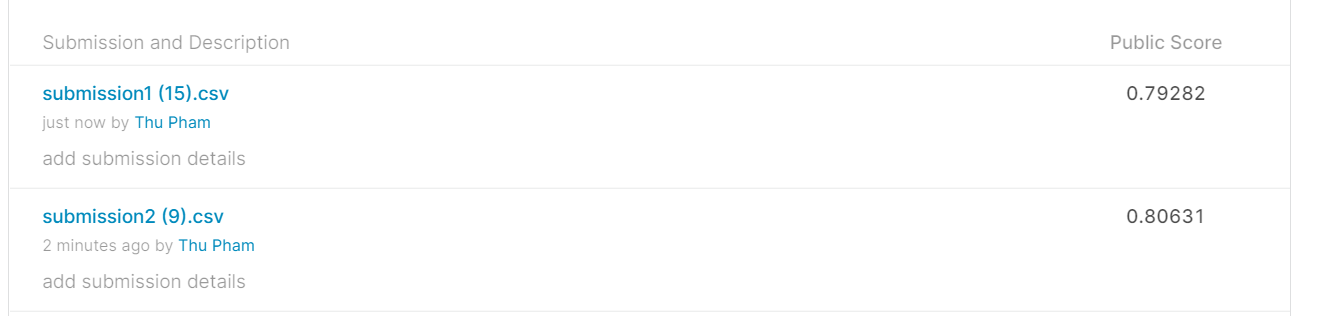

In [ ]:
from PIL import Image

# Kaggle Score - Model 1 & 2
path = "/content/drive/My Drive/MSDS 422/Assignment 8/result.PNG"
img  = Image.open(path) 
img

# Exposition

The purpose of this project is to correctly predict whether a tweet is about real disaster or not. It utilizes recurrent neural network, which is a type of artificial neural network that works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer. There are 2 different models.

The 1st model has 7 layers, utilizing unidirectional LSTM. The training accuracy is 78.80%. The validation accuracy is 79.71%. The test accuracy is 79.28%.

The 2nd model has 7 layers, utilizing bidirectional LSTM. The training accuracy is 82.68%. The validation accuracy is 80.24%. The test accuracy is 80.63%.